In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
torch.manual_seed(1)

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [12]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [13]:
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad=True)

### 로지스틱 회귀 식

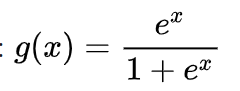

In [14]:
# e^x : torch.exp(x)
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [15]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [16]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [17]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [18]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [20]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [21]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [22]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [23]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [26]:
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.009292
Epoch  100/1000 Cost: 0.133813
Epoch  200/1000 Cost: 0.080325
Epoch  300/1000 Cost: 0.057738
Epoch  400/1000 Cost: 0.045202
Epoch  500/1000 Cost: 0.037195
Epoch  600/1000 Cost: 0.031625
Epoch  700/1000 Cost: 0.027520
Epoch  800/1000 Cost: 0.024366
Epoch  900/1000 Cost: 0.021866
Epoch 1000/1000 Cost: 0.019834


In [27]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7584e-04],
        [3.1581e-02],
        [3.8941e-02],
        [9.5626e-01],
        [9.9824e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [28]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
